<a href="https://colab.research.google.com/github/waseemnabi08/16-bit-processor-using-Verilog/blob/main/MNIST_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Classification: A Multi-Model Approach By **Waseem**

**Step 1: Imports and Setup**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

# Set plot style
sns.set(style="whitegrid")
print("Setup done")

Setup done


**Load and Explore Data**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training Data Shape: (50000, 28, 28)
Testing Data Shape: (10000, 28, 28)


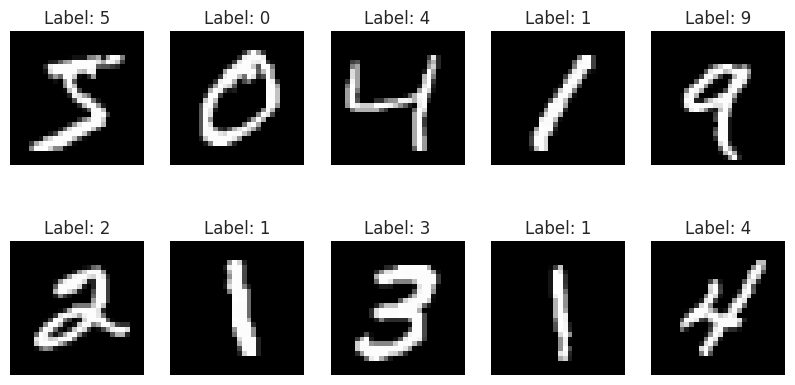

In [3]:
# Load data from Keras (Standard source for MNIST)
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# 1. Assignment Requirement: Split data into training (50,000) and testing (10,000)
# Standard MNIST is 60k train, so we slice the first 50k to strictly match requirements
X_train = X_train_full[:50000]
y_train = y_train_full[:50000]

# 2. Write the shape of the dataset
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

# 3.Show examples of images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

**Step 3: Define Evaluation Function**

In [4]:
results_list = []

def evaluate_model(model_name, y_true, y_pred):
    # Calculate Accuracy [cite: 28]
    acc = accuracy_score(y_true, y_pred)
    print(f"--- {model_name} Results ---")
    print(f"Accuracy: {acc:.4f}")

    # Generate Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # [cite: 32]
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Precision, Recall, F1-Score [cite: 33, 34, 35, 36]
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # Save for final comparison
    results_list.append({"Model": model_name, "Accuracy": acc})

#Step 4: Train and Evaluate Models

**1. K-Nearest Neighbours (KNN)**

Training KNN...
--- KNN Results ---
Accuracy: 0.9681


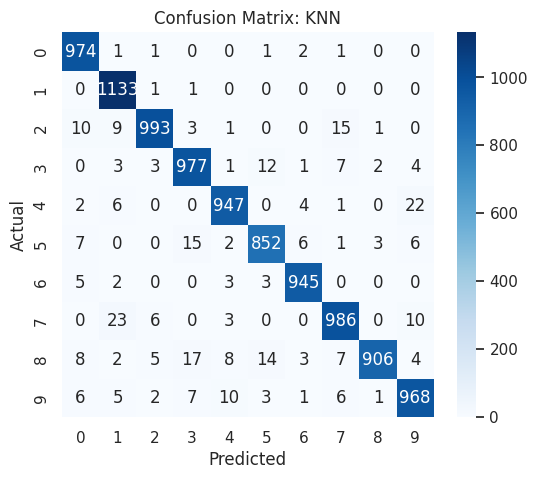

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [7]:
print("Training KNN...")

# Flatten the images for KNN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
x_test_flat = X_test.reshape(X_test.shape[0], -1)

knn = KNeighborsClassifier(n_neighbors=3) #As mentioned in assigment
knn.fit(X_train_flat, y_train)
y_pred_knn = knn.predict(x_test_flat)
evaluate_model("KNN", y_test, y_pred_knn)

**2. Naive Bayes**

Training Naive Bayes...
--- Naive Bayes Results ---
Accuracy: 0.5544


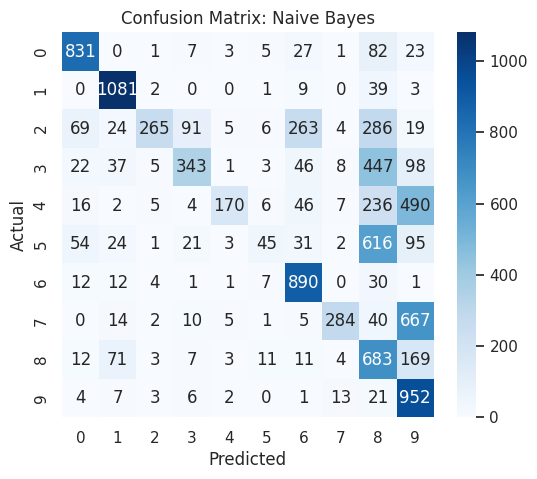

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       980
           1       0.85      0.95      0.90      1135
           2       0.91      0.26      0.40      1032
           3       0.70      0.34      0.46      1010
           4       0.88      0.17      0.29       982
           5       0.53      0.05      0.09       892
           6       0.67      0.93      0.78       958
           7       0.88      0.28      0.42      1028
           8       0.28      0.70      0.40       974
           9       0.38      0.94      0.54      1009

    accuracy                           0.55     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.55      0.52     10000



In [10]:
print("Training Naive Bayes...")
nb = GaussianNB()
nb.fit(X_train_flat, y_train)
y_pred_nb = nb.predict(x_test_flat)
evaluate_model("Naive Bayes", y_test, y_pred_nb)

**3. Decision Tree Classifier**

Training Decision Tree...
--- Decision Tree Results ---
Accuracy: 0.8693


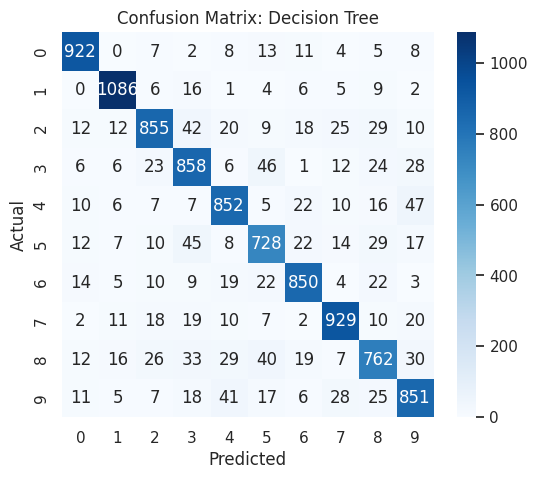

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.94      0.96      0.95      1135
           2       0.88      0.83      0.85      1032
           3       0.82      0.85      0.83      1010
           4       0.86      0.87      0.86       982
           5       0.82      0.82      0.82       892
           6       0.89      0.89      0.89       958
           7       0.89      0.90      0.90      1028
           8       0.82      0.78      0.80       974
           9       0.84      0.84      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [12]:
print("Training Decision Tree...")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_flat, y_train)
y_pred_dt = dt.predict(x_test_flat)
evaluate_model("Decision Tree", y_test, y_pred_dt)

**4. Feed-Forward Neural Network (MLP)**

Training MLP...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
--- MLP (Neural Network) Results ---
Accuracy: 0.9494


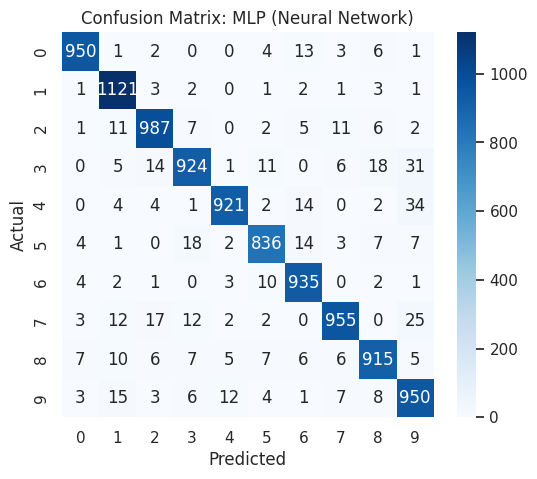

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.96      0.95      1032
           3       0.95      0.91      0.93      1010
           4       0.97      0.94      0.96       982
           5       0.95      0.94      0.94       892
           6       0.94      0.98      0.96       958
           7       0.96      0.93      0.95      1028
           8       0.95      0.94      0.94       974
           9       0.90      0.94      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [14]:
print("Training MLP...")
# Define Model
mlp = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)), #
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # Output layer for 10 digits
])

# Compile and Train [cite: 26]
mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp.fit(X_train_flat, y_train, epochs=5, batch_size=64, verbose=0)

# Evaluate
y_pred_mlp_probs = mlp.predict(x_test_flat)
y_pred_mlp = np.argmax(y_pred_mlp_probs, axis=1) # Convert probabilities to class labels
evaluate_model("MLP (Neural Network)", y_test, y_pred_mlp)

**5. Convolutional Neural Network (CNN)**

Training CNN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
--- CNN Results ---
Accuracy: 0.9869


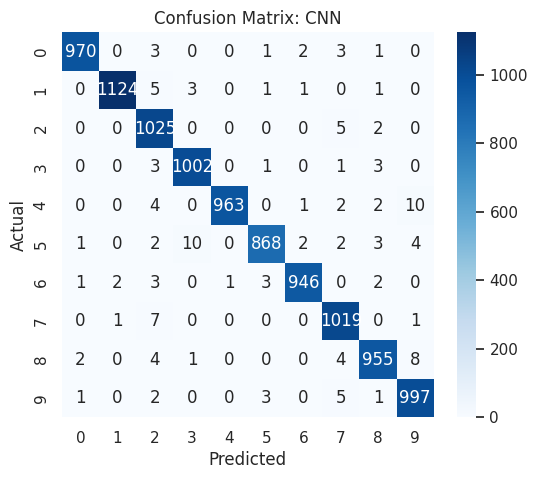

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [18]:
print("Training CNN...")

# Reshape data for CNN: add a channel dimension
X_train_cnn = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0 # Normalize to [0, 1]
X_test_cnn = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0 # Normalize to [0, 1]

# Define Model
cnn = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

# Compile and Train [cite: 26]
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=5, batch_size=64, verbose=0)

# Evaluate
y_pred_cnn_probs = cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)
evaluate_model("CNN", y_test, y_pred_cnn)

**Step 5: Final Comparison**


--- Final Model Comparison ---
                  Model  Accuracy
5                   CNN    0.9869
0                   KNN    0.9681
4  MLP (Neural Network)    0.9494
3         Decision Tree    0.8693
1           Naive Bayes    0.5544
2           Naive Bayes    0.5544


/tmp/ipython-input-3069891072.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=comparison_df, palette="viridis")


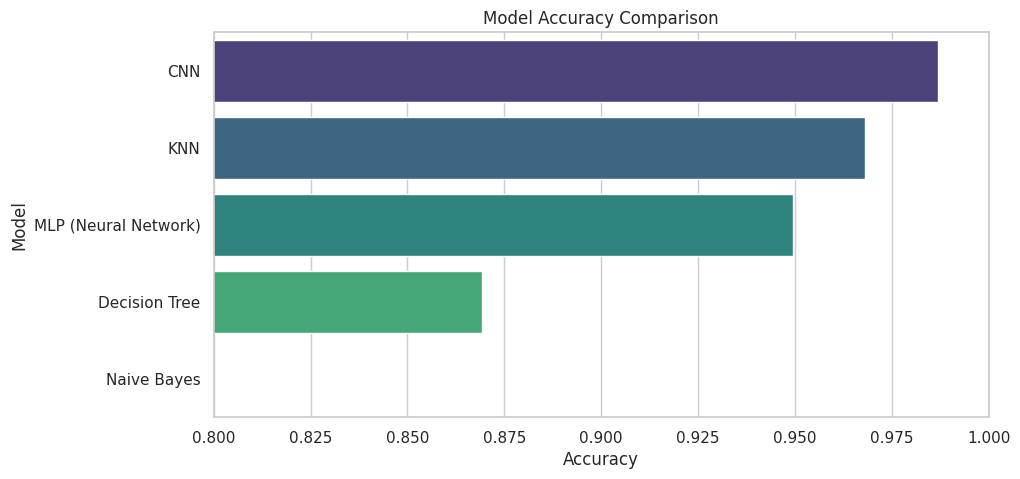

In [19]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results_list)
comparison_df = comparison_df.sort_values(by="Accuracy", ascending=False)

print("\n--- Final Model Comparison ---")
print(comparison_df)

# Optional: Plot comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Accuracy", y="Model", data=comparison_df, palette="viridis")
plt.xlim(0.8, 1.0) # Zoom in to see differences
plt.title("Model Accuracy Comparison")
plt.show()